<a href="https://colab.research.google.com/github/matheusregis/piPythoCalc/blob/main/pi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random

def pi(n):
    count = 0
    insideX = []
    insideY = []
    outsideX = []
    outsideY = []
    for i in range(n):
        x = random.uniform(0, 1)
        y = random.uniform(0, 1)
        if (x ** 2 + y ** 2) < 1.0:
            count = count + 1
            insideX.append(x)
            insideY.append(y)
        else:        
            outsideX.append(x)
            outsideY.append(y)        
    return (count, insideX, insideY, outsideX, outsideY)


Valor Aproximado do PI 3.14740000


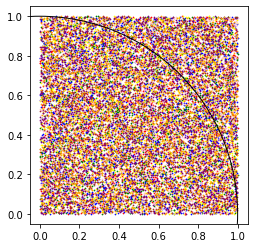

In [2]:
import multiprocessing
import matplotlib.pyplot as plt
if __name__ == "__main__":
  threads = 8;
  total = 20000
  count, insideX, insideY, outsideX, outsideY = pi(total)
  threadsTotal = []
  for i in range(threads):
    calc = int(total/threads)
    threadsTotal.append(calc)
  pool = multiprocessing.Pool(threads)
  result = pool.map(pi, threadsTotal)

fig, ax = plt.subplots()
circle = plt.Circle((0, 0), 1, fill=False)
ax.set_aspect(1)
ax.add_artist(circle)
countColor = 0
colorThreads = ['red', 'green', 'blue', 'yellow', 'pink', 'brown', 'purple', 'orange']

for tupla in result:
    inX = tupla[1]
    inY = tupla[2]
    outX = tupla[3]
    outY = tupla[4]
    ax.set_aspect('equal')
    ax.scatter(inX, inY, color=colorThreads[countColor], s=0.5)
    ax.scatter(outX, outY, color=colorThreads[countColor], s=0.5)
    countColor = countColor + 1

    
fig.savefig('PI.pdf')
piValue = float(count*4)/total
print('Valor Aproximado do PI {:.8f}'.format(piValue))